In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
from pathlib import Path
import tensorflow as tf
import keras as kr

In [2]:
filePath =Path(r"C:\Users\pinupas\Downloads\datasets\food101\images")

# Data PreProcessing

1) 

In [3]:
imagePaths=list(filePath.glob(r'**/*.jpg'))

In [4]:
os.path.split(os.path.split(imagePaths[0])[0])[1]

'apple_pie'

In [5]:
labels=[os.path.split(os.path.split(x)[0])[1] for x in imagePaths ]

In [6]:
len(labels)

101000

In [7]:
labels=pd.Series(labels,name="Label")

In [8]:
labels

0         apple_pie
1         apple_pie
2         apple_pie
3         apple_pie
4         apple_pie
            ...    
100995      waffles
100996      waffles
100997      waffles
100998      waffles
100999      waffles
Name: Label, Length: 101000, dtype: object

In [9]:
imagePaths=pd.Series(imagePaths,name='FilePath').astype('str')

In [10]:
imagePaths

0         C:\Users\pinupas\Downloads\datasets\food101\im...
1         C:\Users\pinupas\Downloads\datasets\food101\im...
2         C:\Users\pinupas\Downloads\datasets\food101\im...
3         C:\Users\pinupas\Downloads\datasets\food101\im...
4         C:\Users\pinupas\Downloads\datasets\food101\im...
                                ...                        
100995    C:\Users\pinupas\Downloads\datasets\food101\im...
100996    C:\Users\pinupas\Downloads\datasets\food101\im...
100997    C:\Users\pinupas\Downloads\datasets\food101\im...
100998    C:\Users\pinupas\Downloads\datasets\food101\im...
100999    C:\Users\pinupas\Downloads\datasets\food101\im...
Name: FilePath, Length: 101000, dtype: object

In [11]:
data=pd.concat([imagePaths,labels],axis=1)

In [12]:
data

,FilePath,Label
0,C:\Users\pinupas\Downloads\datasets\food101\im...,apple_pie
1,C:\Users\pinupas\Downloads\datasets\food101\im...,apple_pie
2,C:\Users\pinupas\Downloads\datasets\food101\im...,apple_pie
3,C:\Users\pinupas\Downloads\datasets\food101\im...,apple_pie
4,C:\Users\pinupas\Downloads\datasets\food101\im...,apple_pie
...,...,...
100995,C:\Users\pinupas\Downloads\datasets\food101\im...,waffles
100996,C:\Users\pinupas\Downloads\datasets\food101\im...,waffles
100997,C:\Users\pinupas\Downloads\datasets\food101\im...,waffles
100998,C:\Users\pinupas\Downloads\datasets\food101\im...,waffles


In [13]:
data['FilePath'][101]

'C:\\Users\\pinupas\\Downloads\\datasets\\food101\\images\\apple_pie\\1357950.jpg'

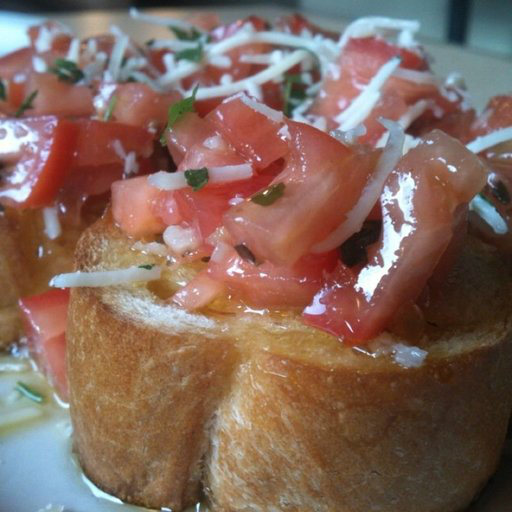

In [21]:
Image.open(data['FilePath'][10010])

In [22]:
cv2.imread('C:\\Users\\pinupas\\Downloads\\datasets\\food101\\images\\apple_pie\\1005649.jpg').shape

(512, 308, 3)

In [23]:
print(data['Label'][0])

apple_pie


In [24]:
data['Label'].value_counts()

french_fries      1000
ceviche           1000
bread_pudding     1000
apple_pie         1000
pizza             1000
                  ... 
baby_back_ribs    1000
carrot_cake       1000
waffles           1000
beet_salad        1000
pancakes          1000
Name: Label, Length: 101, dtype: int64

In [25]:
category_samples=[]

for category in data['Label'].unique():
    category_slice = data.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [26]:
image_df

,FilePath,Label
0,C:\Users\pinupas\Downloads\datasets\food101\im...,paella
1,C:\Users\pinupas\Downloads\datasets\food101\im...,steak
2,C:\Users\pinupas\Downloads\datasets\food101\im...,bread_pudding
3,C:\Users\pinupas\Downloads\datasets\food101\im...,waffles
4,C:\Users\pinupas\Downloads\datasets\food101\im...,french_toast
...,...,...
10095,C:\Users\pinupas\Downloads\datasets\food101\im...,croque_madame
10096,C:\Users\pinupas\Downloads\datasets\food101\im...,poutine
10097,C:\Users\pinupas\Downloads\datasets\food101\im...,breakfast_burrito
10098,C:\Users\pinupas\Downloads\datasets\food101\im...,guacamole


In [27]:
image_df['Label'].value_counts()

pork_chop       100
creme_brulee    100
ramen           100
peking_duck     100
panna_cotta     100
               ... 
cup_cakes       100
sushi           100
dumplings       100
escargots       100
scallops        100
Name: Label, Length: 101, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

# Split into train+validation and test sets
train_val_df, test_df = train_test_split(image_df, test_size=0.2, random_state=1, stratify=image_df['Label'])

# Split train+validation into train and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=1, stratify=train_val_df['Label'])

# Print the sizes of each set
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 6464
Validation set size: 1616
Test set size: 2020


In [29]:
test_df

,FilePath,Label
1937,C:\Users\pinupas\Downloads\datasets\food101\im...,tiramisu
965,C:\Users\pinupas\Downloads\datasets\food101\im...,foie_gras
2847,C:\Users\pinupas\Downloads\datasets\food101\im...,chocolate_mousse
8376,C:\Users\pinupas\Downloads\datasets\food101\im...,frozen_yogurt
5057,C:\Users\pinupas\Downloads\datasets\food101\im...,spring_rolls
...,...,...
3590,C:\Users\pinupas\Downloads\datasets\food101\im...,steak
2465,C:\Users\pinupas\Downloads\datasets\food101\im...,ravioli
3702,C:\Users\pinupas\Downloads\datasets\food101\im...,pancakes
9740,C:\Users\pinupas\Downloads\datasets\food101\im...,hot_dog


In [30]:
train_df

,FilePath,Label
9299,C:\Users\pinupas\Downloads\datasets\food101\im...,grilled_cheese_sandwich
2220,C:\Users\pinupas\Downloads\datasets\food101\im...,french_toast
2268,C:\Users\pinupas\Downloads\datasets\food101\im...,baklava
6418,C:\Users\pinupas\Downloads\datasets\food101\im...,steak
3745,C:\Users\pinupas\Downloads\datasets\food101\im...,spaghetti_carbonara
...,...,...
2490,C:\Users\pinupas\Downloads\datasets\food101\im...,cup_cakes
614,C:\Users\pinupas\Downloads\datasets\food101\im...,seaweed_salad
7457,C:\Users\pinupas\Downloads\datasets\food101\im...,pho
2475,C:\Users\pinupas\Downloads\datasets\food101\im...,cheese_plate


In [31]:
val_df

,FilePath,Label
655,C:\Users\pinupas\Downloads\datasets\food101\im...,churros
7856,C:\Users\pinupas\Downloads\datasets\food101\im...,pancakes
7343,C:\Users\pinupas\Downloads\datasets\food101\im...,onion_rings
2055,C:\Users\pinupas\Downloads\datasets\food101\im...,chicken_wings
5965,C:\Users\pinupas\Downloads\datasets\food101\im...,risotto
...,...,...
3004,C:\Users\pinupas\Downloads\datasets\food101\im...,takoyaki
6637,C:\Users\pinupas\Downloads\datasets\food101\im...,french_onion_soup
1507,C:\Users\pinupas\Downloads\datasets\food101\im...,cannoli
1804,C:\Users\pinupas\Downloads\datasets\food101\im...,chicken_wings


In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Validation and test data generators (no augmentation, just rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

In [27]:
# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='FilePath',  # Column containing image file paths
    y_col='Label',  # Column containing labels
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffle the data
)

# Validation generator
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle validation data
)

# Test generator
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

Found 6464 validated image filenames belonging to 101 classes.
Found 1616 validated image filenames belonging to 101 classes.
Found 2020 validated image filenames belonging to 101 classes.


In [42]:
test_generator[0][0][0].shape

(224, 224, 3)

# Neural Network Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(101, activation='softmax'))

In [91]:
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               77070848  
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 101)               25957     
                                                                 
Total params: 77228133 (294.60 MB)
Trainable params: 77228133 (294.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
history=model.fit(
    train_images,  # Training data
    steps_per_epoch=train_images.samples // train_images.batch_size,  # Number of batches per epoch
    validation_data=val_images,  # Validation data
    validation_steps=val_images.samples // val_images.batch_size,  # Number of validation batches
    epochs=10  # Number of epochs
)

Epoch 1/10
202/202 [==============================] - 481s 2s/step - loss: 18.4846 - accuracy: 0.0111 - val_loss: 4.6192 - val_accuracy: 0.0081
Epoch 2/10
202/202 [==============================] - 324s 2s/step - loss: 4.6176 - accuracy: 0.0096 - val_loss: 4.6163 - val_accuracy: 0.0069
Epoch 3/10
202/202 [==============================] - 373s 2s/step - loss: 4.6169 - accuracy: 0.0128 - val_loss: 4.6319 - val_accuracy: 0.0075
Epoch 4/10
202/202 [==============================] - 324s 2s/step - loss: 4.6195 - accuracy: 0.0124 - val_loss: 4.6185 - val_accuracy: 0.0075
Epoch 5/10
202/202 [==============================] - 335s 2s/step - loss: 4.6142 - accuracy: 0.0114 - val_loss: 4.6195 - val_accuracy: 0.0075
Epoch 6/10
202/202 [==============================] - 317s 2s/step - loss: 4.6139 - accuracy: 0.0118 - val_loss: 4.6202 - val_accuracy: 0.0075
Epoch 7/10
202/202 [==============================] - 322s 2s/step - loss: 4.6136 - accuracy: 0.0105 - val_loss: 4.6210 - val_accuracy: 0.007

# CNN

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # 32 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully Connected Layer 1
    Dense(512, activation='relu'),
   # Dropout(0.5),  # Dropout to prevent overfitting

    # Fully Connected Layer 2
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output Layer
    Dense(101, activation='softmax')  # Output layer for 101 classes
])

In [45]:
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,  # Number of validation batches
    epochs=10  # Number of epochs
)

Epoch 1/10
202/202 [==============================] - 569s 3s/step - loss: 4.6338 - accuracy: 0.0071 - val_loss: 4.6151 - val_accuracy: 0.0094
Epoch 2/10
202/202 [==============================] - 614s 3s/step - loss: 4.6171 - accuracy: 0.0080 - val_loss: 4.6151 - val_accuracy: 0.0100
Epoch 3/10
152/202 [=====================>........] - ETA: 5:21 - loss: 4.6161 - accuracy: 0.0076

# RESNET Model (Pretrained)

In [32]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,  # ResNet preprocessing
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Validation and test data generators (no augmentation, just preprocessing)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)

In [35]:
# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="FilePath",  # Column containing image file paths
    y_col="Label",  # Column containing labels
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode="categorical",  # Multi-class classification
    shuffle=True  # Shuffle the data
)

# Validation generator
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="FilePath",
    y_col="Label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Do not shuffle validation data
)

# Test generator
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="FilePath",
    y_col="Label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Do not shuffle test data
)

Found 6464 validated image filenames belonging to 101 classes.
Found 1616 validated image filenames belonging to 101 classes.
Found 2020 validated image filenames belonging to 101 classes.


In [36]:
# Load the ResNet50 model with pre-trained weights from ImageNet
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

In [38]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
x = Dense(512, activation="relu")(x)  # Fully connected layer with 512 neurons
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation="relu")(x)  # Fully connected layer with 256 neurons
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output = Dense(101, activation="softmax")(x)  # Output layer for 101 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [39]:
model.compile(
    optimizer="adam",  # Adam optimizer
    loss="categorical_crossentropy",  # Categorical cross-entropy for multi-class classification
    metrics=["accuracy"]  # Track accuracy during training
)

In [41]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,  # Number of validation batches
    epochs=50  # Number of epochs
)

Epoch 1/50
202/202 [==============================] - 673s 3s/step - loss: 3.1083 - accuracy: 0.2358 - val_loss: 2.6866 - val_accuracy: 0.3344
Epoch 2/50
202/202 [==============================] - 662s 3s/step - loss: 3.0509 - accuracy: 0.2373 - val_loss: 2.6199 - val_accuracy: 0.3650
Epoch 3/50
202/202 [==============================] - 649s 3s/step - loss: 2.9828 - accuracy: 0.2546 - val_loss: 2.5928 - val_accuracy: 0.3600
Epoch 4/50
202/202 [==============================] - 692s 3s/step - loss: 2.9605 - accuracy: 0.2585 - val_loss: 2.5005 - val_accuracy: 0.3750
Epoch 5/50
202/202 [==============================] - 663s 3s/step - loss: 2.9462 - accuracy: 0.2661 - val_loss: 2.4730 - val_accuracy: 0.3881
Epoch 6/50
202/202 [==============================] - 666s 3s/step - loss: 2.8755 - accuracy: 0.2693 - val_loss: 2.5008 - val_accuracy: 0.3706
Epoch 7/50
202/202 [==============================] - 691s 3s/step - loss: 2.8427 - accuracy: 0.2870 - val_loss: 2.4824 - val_accuracy: 0.3919

In [ ]:
model.save("resnet_food101.h5")